#  Data Preparation

## Case study- Kaggle Competition: Cancer Dataset 

- Competition: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+ Cancer+ Wisconsin+ (Diagnostic)
- Reference https://github.com/CesarTrevisan/Breast-Cancer-Detection/blob/master/capstone.ipynb


<img src="images/kagglebc.png" width="800">

## Identify the problem
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

## Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

## Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.



<img src="images/wbcd.png">

## Redundancy
- Some of the features could be dependent, so redundant
- Needs dimension reduction to reduce feature space
- While retaining most of the variance of the original data

## Import
Import necessary libraries and load in the data file and header file provided

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

with open("data/field_names.txt","r") as header_data:
    header_labels = [label.replace("\n",'') for label in header_data]
    
header_labels

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

### Load Dataset
First, load the supplied CSV file using additional options in the Pandas read_csv function.

### Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:

- The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
- Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
- For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [2]:
df = pd.read_csv("data/breast-cancer.csv")
df.columns = header_labels
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

The method get_dtype_counts() will return the number of columns of each type in a DataFrame:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
ID                            568 non-null int64
diagnosis                     568 non-null object
radius_mean                   568 non-null float64
radius_sd_error               568 non-null float64
radius_worst                  568 non-null float64
texture_mean                  568 non-null float64
texture_sd_error              568 non-null float64
texture_worst                 568 non-null float64
perimeter_mean                568 non-null float64
perimeter_sd_error            568 non-null float64
perimeter_worst               568 non-null float64
area_mean                     568 non-null float64
area_sd_error                 568 non-null float64
area_worst                    568 non-null float64
smoothness_mean               568 non-null float64
smoothness_sd_error           568 non-null float64
smoothness_worst              568 non-null float64
compactness_mean              5

In [4]:
df.get_dtype_counts()

float64    30
int64       1
object      1
dtype: int64

From the above results, from the 32, variables,column id number 1 is an integer, diagnosis 569 non-null object. and rest are float. 

In [5]:
df.shape

length = len(df)
features = df.shape[1]-1
malignant = len(df[df['diagnosis']=='M'])
benign = len(df[df['diagnosis']=='B'])
ratio = (float(malignant)/(length))*100

print("{} rows".format(str(len(df))))
print("{} features".format(features))
print("{} diagnosed as malignant tumor".format(malignant))
print("{} diagnosed as benign tumor".format(benign))
print("{} percentage of malignant tumor".format(ratio))

568 rows
31 features
211 diagnosed as malignant tumor
357 diagnosed as benign tumor
37.147887323943664 percentage of malignant tumor


## Dimensionality of the Dataset

- 568 rows/observations and 32 columns. 
- Out of these 32, 1 is target and 31 are features
- Out of 31 features, one is "ID" (not useful) so really there are 30 features/dimensions
- Each row is a point in 30 Dimension space


## Basic descriptive statistics

In [6]:
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check for missing values

In [7]:
pd.isnull(df).any()

ID                            False
diagnosis                     False
radius_mean                   False
radius_sd_error               False
radius_worst                  False
texture_mean                  False
texture_sd_error              False
texture_worst                 False
perimeter_mean                False
perimeter_sd_error            False
perimeter_worst               False
area_mean                     False
area_sd_error                 False
area_worst                    False
smoothness_mean               False
smoothness_sd_error           False
smoothness_worst              False
compactness_mean              False
compactness_sd_error          False
compactness_worst             False
concavity_mean                False
concavity_sd_error            False
concavity_worst               False
concave_points_mean           False
concave_points_sd_error       False
concave_points_worst          False
symmetry_mean                 False
symmetry_sd_error           

### Visualise distribution of data via histograms

Separate columns into smaller dataframes to perform visualization

In [8]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
print(df_mean.columns)
print(df_se.columns)
print(df_worst.columns)

Index(['id', 'diagnosis'], dtype='object')
Index(['diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst'],
      dtype='object')
Index(['area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean',
       'smoothness_sd_error', 'smoothness_worst', 'compactness_mean',
       'compactness_sd_error', 'compactness_worst', 'concavity_mean',
       'concavity_sd_error'],
      dtype='object')
Index(['concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')


C:\Users\Yogesh Kulkarni\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Histogram the "_mean" suffix designition


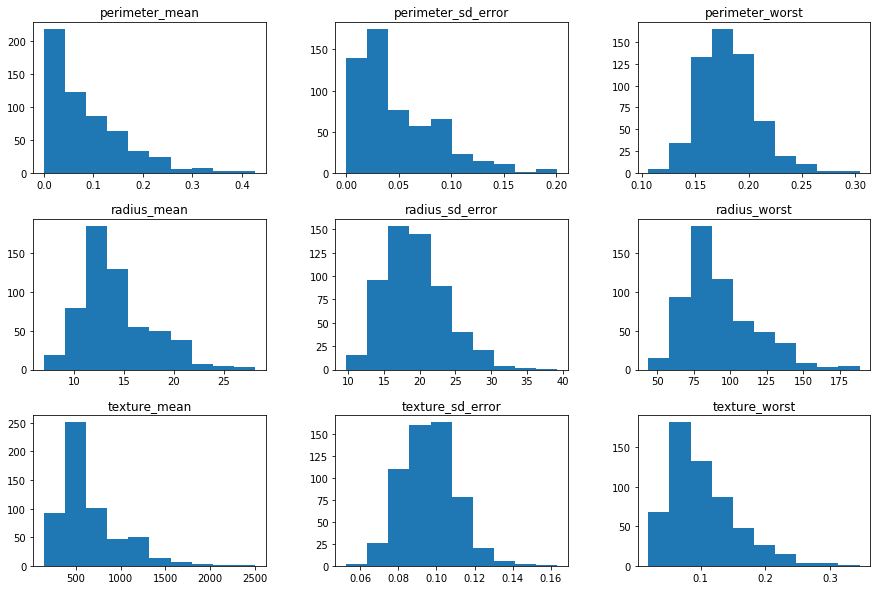

In [9]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

Histogram the "_se" suffix designition


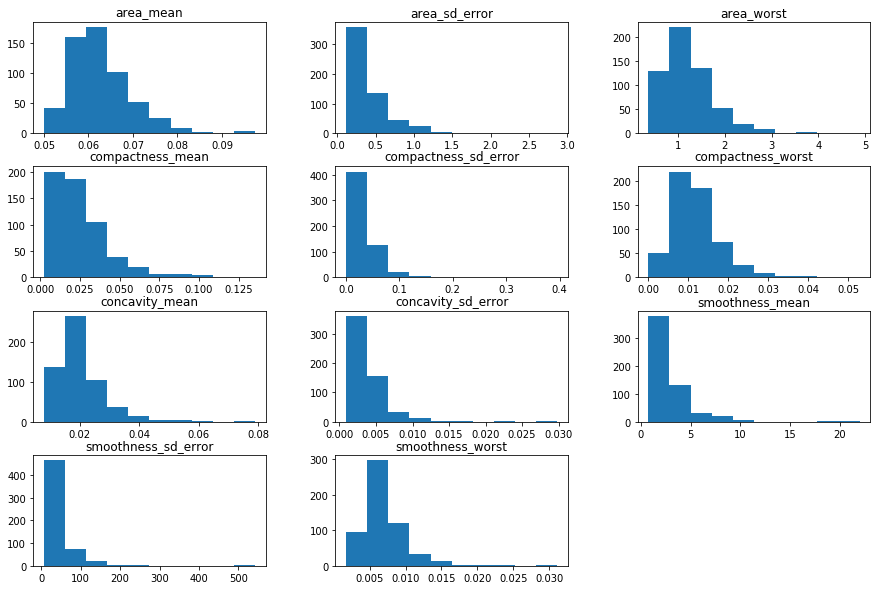

In [10]:
#Plot histograms of se
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

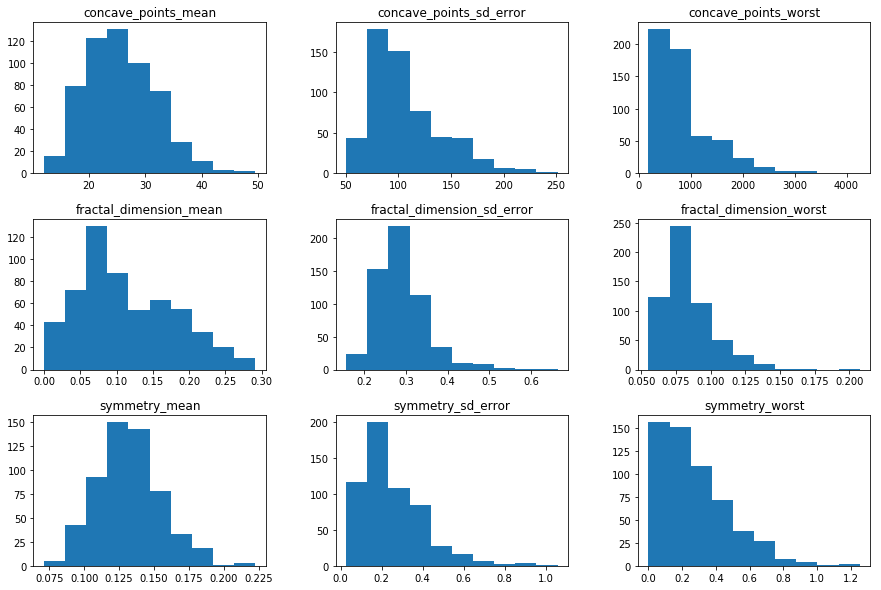

In [11]:
#Plot histograms of worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

### Observations

- We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution ( ). 
- We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. 
- This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.



## Visualize distribution of data via density plots
Density plots "_mean" suffix designition

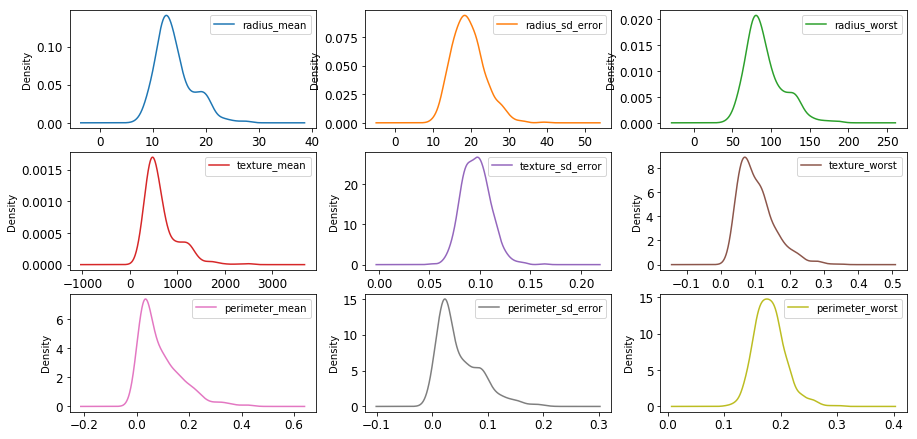

In [12]:
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

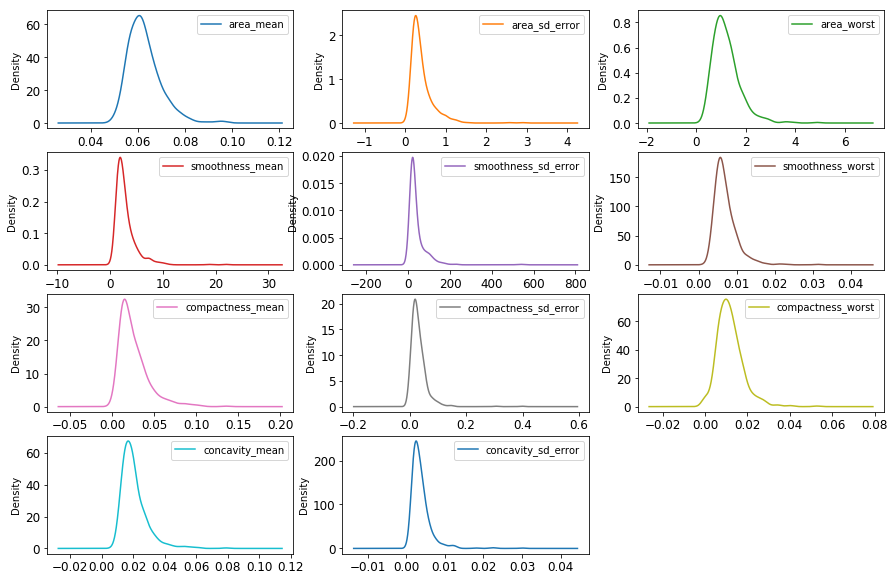

In [13]:
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

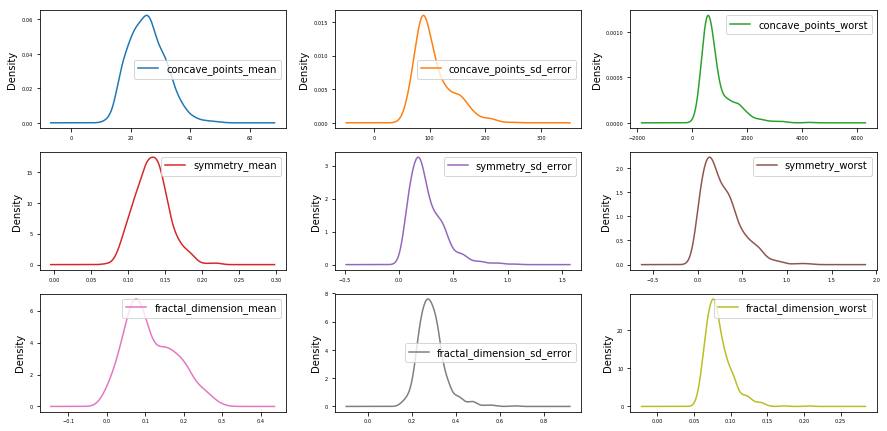

In [14]:
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))

### Observations
- We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). 
- We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. 
- This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


## Visualize distribution of data via box plots
Box plots "_mean" suffix designition

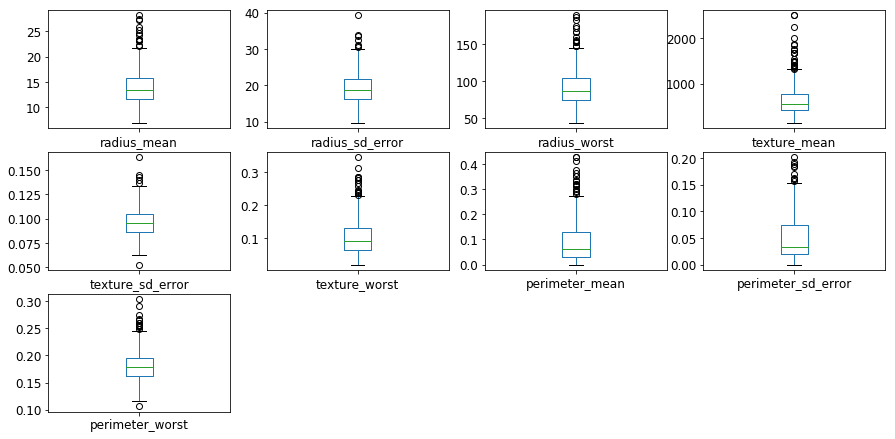

In [15]:
plt = df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

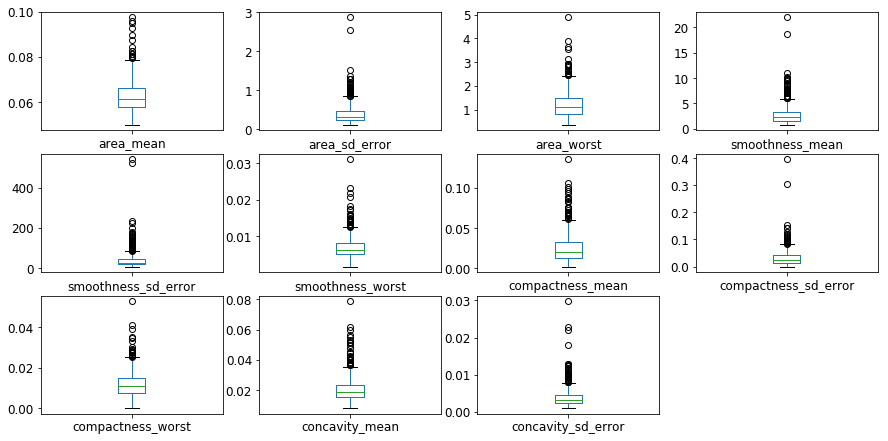

In [16]:
plt = df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

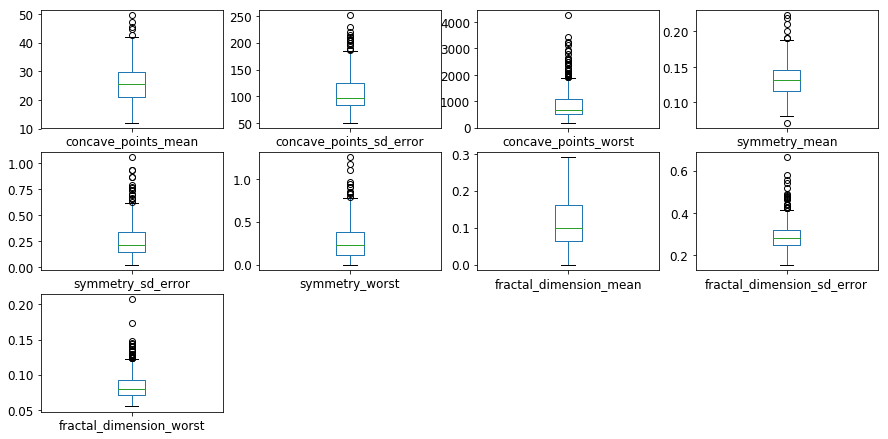

In [17]:
plt = df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

### Observations
- We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). 
- We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. 
- This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Correlation matrix

There could be many features which are correlated

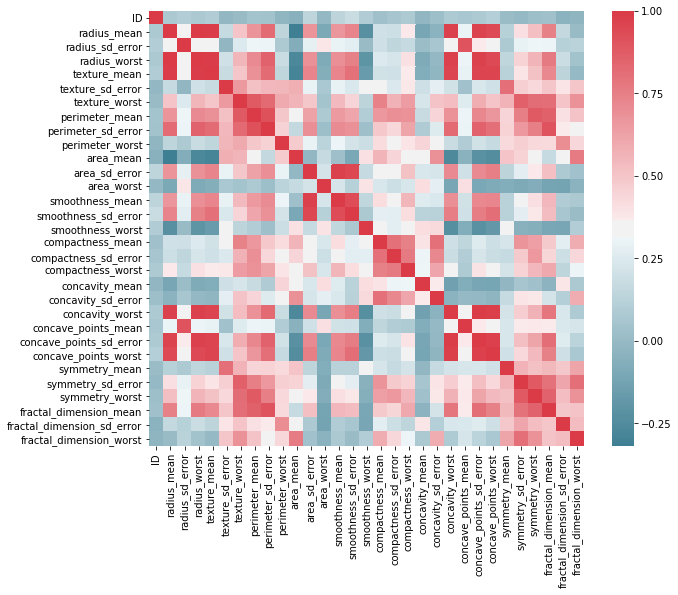

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

A better plot would be

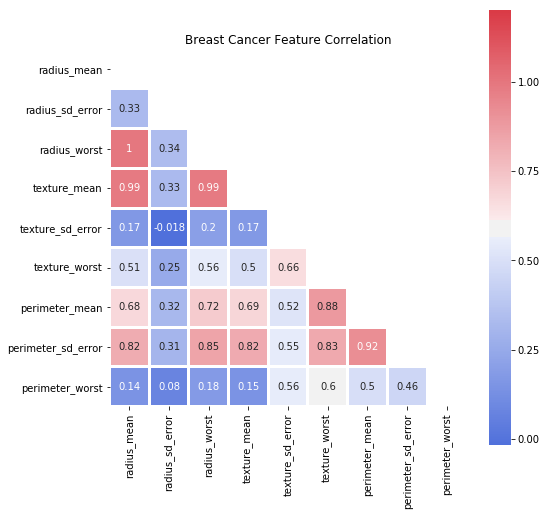

In [19]:
# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

### Observation:
We can see strong positive relationship exists with mean values paramaters between 1-0.75;.

- The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
- Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
- Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

Another nice plot would be

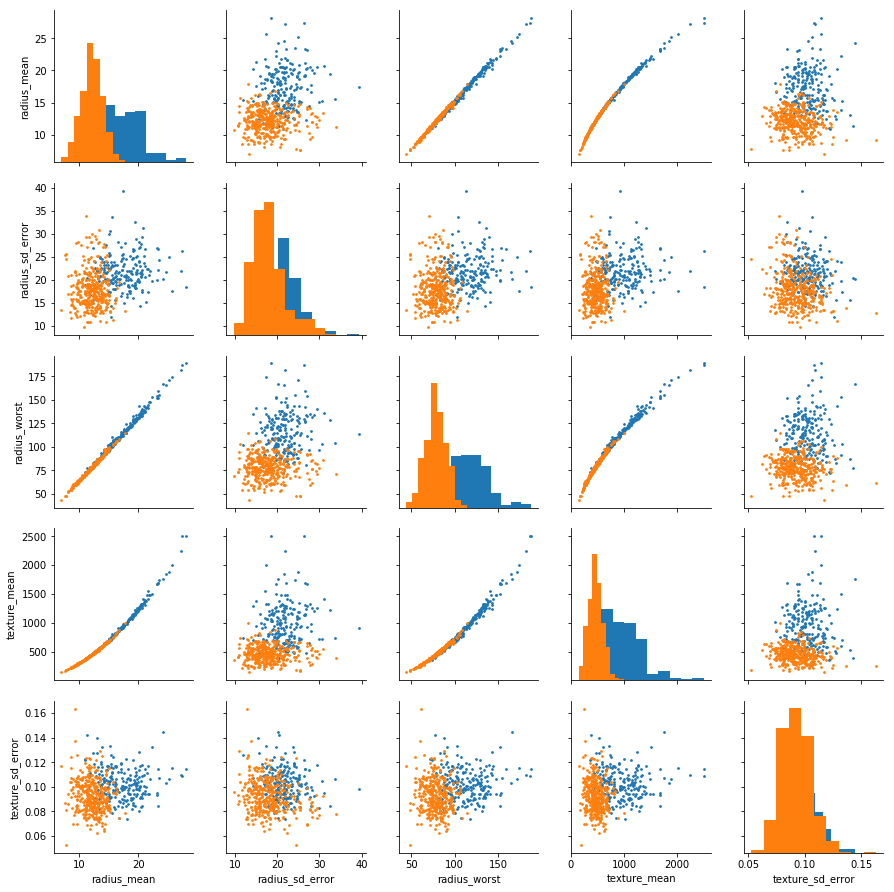

In [20]:
g = sns.PairGrid(df[[df.columns[1],df.columns[2],df.columns[3],
                     df.columns[4], df.columns[5],df.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### Understanding so far

- Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

- In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## There are some stronge correlations

Features like (something)_mean, (something)_se, (something)_worst, have a natural correlation because all these are generated using same data, for example: to generate radius_mean, radius_se and radius_worst, radius mesuraments is used.

### Positive Correlation:
Radius, Perimeter and Area have stronge positive correlation

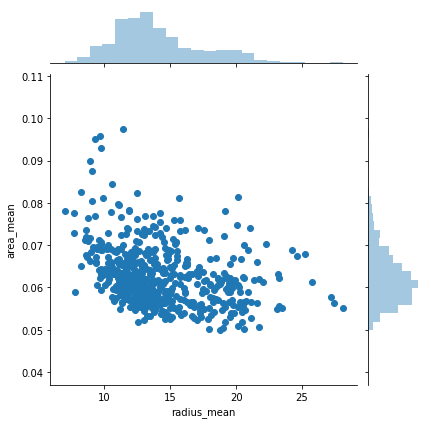

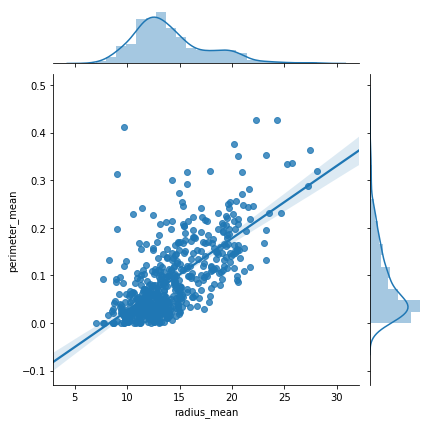

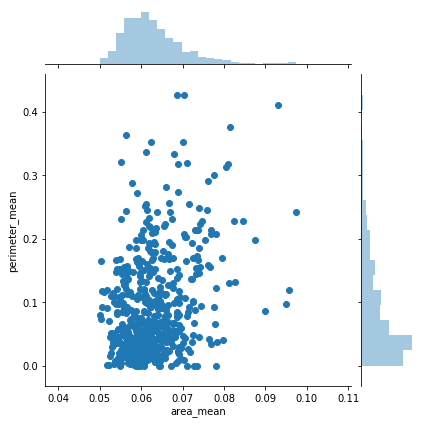

In [21]:
# Plot correlation between 2 features and distribution
sns.jointplot(df.loc[:,'radius_mean'], 
              df.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(df.loc[:,'radius_mean'], 
              df.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(df.loc[:,'area_mean'], 
              df.loc[:,'perimeter_mean'], 
              kind="scatter")

We can see pair-wise correlation

Text(0.5, 1.0, 'Any correlation?')

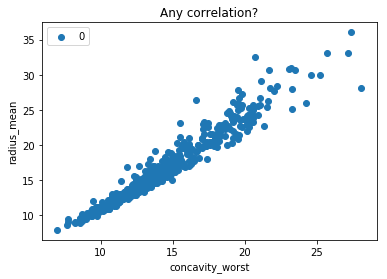

In [22]:
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['radius_mean'],
    y=df['concavity_worst'],
    marker='o', 
    alpha=0.3,
    ax.scatter(x,y, label=str(i))
plt.ylabel("radius_mean")
plt.xlabel("concavity_worst")
plt.legend(loc="best")
plt.title("Any correlation?")

Clear correlation between radius_mean and concavity_worst. One of them can be droppped from X, for training.

There could be many features which are correlated.

Text(0.5, 1.0, 'Any correlation?')

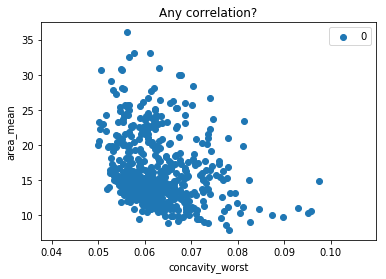

In [23]:
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['area_mean']
    y=df['concavity_worst'],
    ax.scatter(x,y, label=str(i))
plt.ylabel("area_mean")
plt.xlabel("concavity_worst")
plt.legend(loc="best")
plt.title("Any correlation?")

There is no correlation between concavity_worst and area_mean and thus, both can be part of the features for training.


### Negative Correlation
Fractal Dimention have some negative correlation with Radius, Perimeter and Area

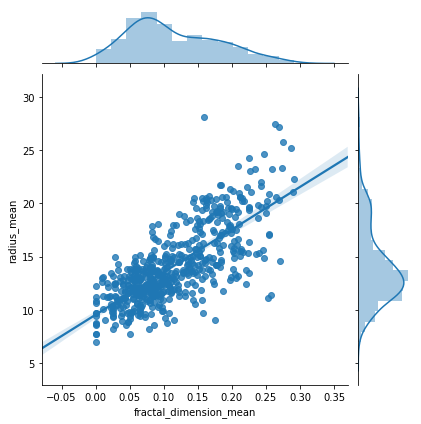

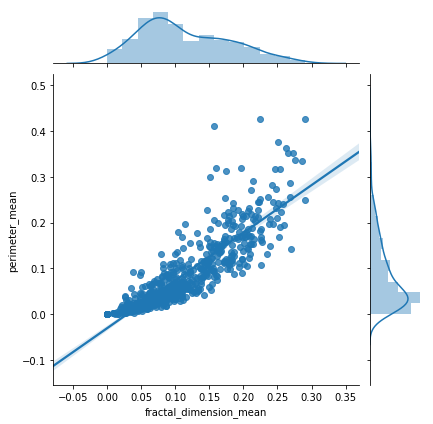

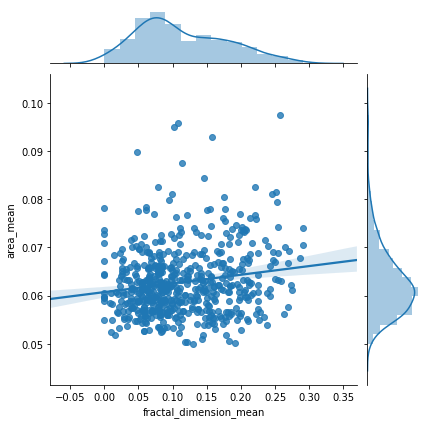

In [24]:
# Plot correlation between 2 features and distribution
sns.jointplot(df.loc[:,'fractal_dimension_mean'], 
              df.loc[:,'radius_mean'], 
              kind="regg")

sns.jointplot(df.loc[:,'fractal_dimension_mean'], 
              df.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(df.loc[:,'fractal_dimension_mean'], 
              df.loc[:,'area_mean'], 
              kind="regg")

## Data Conversions

Need to have all columns except target, as real numeric. 

In [25]:
df = df.set_index("ID")
for col in df.columns:
    if col != "diagnosis":
        df[col] = pd.to_numeric(df[col])

df.dtypes
df.radius_mean.mean()
df.area_mean.mean()

0.06276959507042253

## Training set preparation

Create X and y for training and print their shapes just to make sure that we have all the data


Leaving first (ie 0th) column, rest 31 are features. The first column is 'target'

In [26]:
features = list(df.columns[1:31])
features

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [27]:
target = list(df.columns[0:1])
target

['diagnosis']

In [28]:
cleanup_nums = {'diagnosis':{"M": 1, "B": 0}}

df.replace(cleanup_nums, inplace=True)
Xdf = df[features]

Xdf.shape

(568, 30)

In [29]:
Ydf = df[target[0]]
Ydf.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

### Verifing if Dataset/Target is Balanced

Number of Benign :  357
Number of Malignant :  211


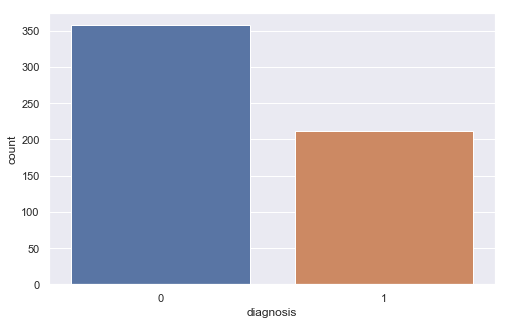

In [30]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(Ydf)

count = Ydf.value_counts()
print('Number of Benign : ',count[0])
print('Number of Malignant : ',count[1])

Data ins't balenced, there is more case of benigns tumors that malignant. Later we'll use methods to balance data and analyze if results get better.

## Feature Engineering

Creating a simple new feature, measuraments_sum_mean just adding feature relatade with cell size

In [31]:
# Creating a new feature adding up some phisical measuraments
Xdf["mesuraments_sum_mean"] = Xdf["radius_mean"] + Xdf["perimeter_mean"] + Xdf["area_mean"]
Xdf.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,mesuraments_sum_mean
ID,,,,,,,,,,,,,,,,,,,,,
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,20.71357
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,19.94739
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,11.75884
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,20.54683
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,12.68393


### Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it

In [32]:
from sklearn import preprocessing

# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(Xdf)

scaled_df.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,mesuraments_sum_mean
0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.637276
1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.601517
2,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.219342
3,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.629494
4,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,0.262518


### Feature Selection using Sklearn

Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. SelectKBest removes all but the k highest scoring features


In [33]:
from sklearn.feature_selection import SelectKBest, chi2

def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    and return a new dataset wiht k best features"""
    
    selector = SelectKBest(chi2, k)
    
    X_new = selector.fit_transform(X, y)
    
    return pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

X_new = selector(Xdf, Ydf, 5)

X_new.head()

,radius_worst,texture_mean,smoothness_sd_error,concave_points_sd_error,concave_points_worst
0,132.90,1326.0,74.08,158.80,1956.0
1,130.00,1203.0,94.03,152.50,1709.0
2,77.58,386.1,27.23,98.87,567.7
3,135.10,1297.0,94.44,152.20,1575.0
4,82.57,477.1,27.19,103.40,741.6


## Cross Validation

Lets start with cross-validation splits. This splits X itself into training and testing, so that we can measure accuracy like metrics.


In [34]:
from sklearn.model_selection import train_test_split

num_train = 450
num_test = Xdf.shape[0] - num_train

X_train, X_test, Y_train, Y_test = train_test_split(Xdf.values, Ydf.values, test_size=num_test, random_state=40)

print("Training: {} rows.".format(X_train.shape[0]))
print("Testing: {} rows.".format(X_test.shape[0]))
print(X_train)
print(Y_train)

Training: 450 rows.
Testing: 118 rows.
[[1.0180000e+01 1.7530000e+01 6.5120000e+01 ... 3.0550000e-01
  8.7970000e-02 1.0266760e+01]
 [1.2880000e+01 1.8220000e+01 8.4450000e+01 ... 2.5820000e-01
  8.8930000e-02 1.3000780e+01]
 [1.3010000e+01 2.2220000e+01 8.2010000e+01 ... 2.2950000e-01
  5.8430000e-02 1.3063935e+01]
 ...
 [1.3000000e+01 2.1820000e+01 8.7500000e+01 ... 4.3780000e-01
  1.0720000e-01 1.3259790e+01]
 [1.3650000e+01 1.3160000e+01 8.7880000e+01 ... 2.3800000e-01
  8.7180000e-02 1.3752320e+01]
 [1.2030000e+01 1.7930000e+01 7.6090000e+01 ... 2.1710000e-01
  7.0370000e-02 1.2092246e+01]]
[0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 1 1 0 1 1